# Análise Exploratória de Dados

In [41]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Fazer leitura do .csv
df = pd.read_csv("data/16P.csv", encoding='ISO-8859-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

Após fazer uma verificação inicial, as colunas do dataframe estão todas no formato int64. Exceto a coluna dos tipos das personalidades.

In [4]:
# Verificar a quantidade de personalidades
df['Personality'].value_counts()

Personality
ESFP    3769
INFJ    3761
ENFP    3760
ENTP    3760
ESTJ    3759
ISTJ    3756
ISTP    3755
ESTP    3749
ISFP    3746
ESFJ    3746
ENFJ    3743
INTJ    3743
INTP    3742
ISFJ    3739
ENTJ    3737
INFP    3734
Name: count, dtype: int64

<Axes: xlabel='Personality'>

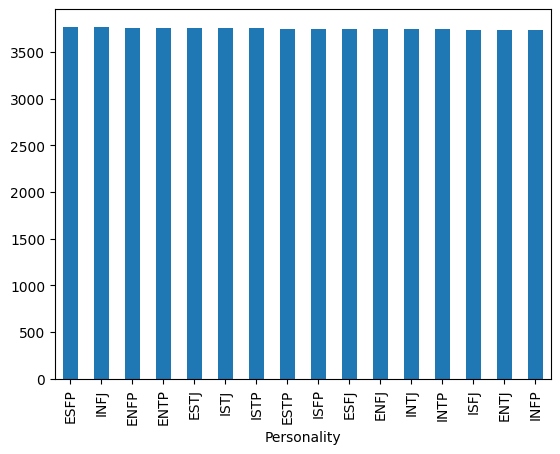

In [5]:
df['Personality'].value_counts().plot(kind='bar')

In [6]:
# Verificar a quantidade de valores nulos
df.isnull().sum()

Response Id                                                                                   0
You regularly make new friends.                                                               0
You spend a lot of your free time exploring various random topics that pique your interest    0
Seeing other people cry can easily make you feel like you want to cry too                     0
You often make a backup plan for a backup plan.                                               0
                                                                                             ..
You are very intrigued by things labeled as controversial.                                    0
You would pass along a good opportunity if you thought someone else needed it more.           0
You struggle with deadlines.                                                                  0
You feel confident that things will work out for you.                                         0
Personality                             

In [7]:
# Mapeando as personalidades
mapa = {'ESFJ': 0, 'ESFP': 1, 'ESTJ': 2, 'ESTP': 3, 'ENFJ': 4, 'ENFP': 5,
         'ENTJ': 6, 'ENTP': 7, 'ISFJ': 8, 'ISFP': 9, 'ISTJ': 10, 'ISTP': 11,
           'INFJ': 12, 'INFP': 13, 'INTJ': 14, 'INTP': 15}

# Mapenado os nomes das colunas em Portugues 
mapa_portugues = {'You regularly make new friends.': 'Faz novos amigos',
                  'You spend a lot of your free time exploring various random topics that pique your interest': 'Passa muito tempo explorando topicos que te interessam',
                  'Seeing other people cry can easily make you feel like you want to cry too': 'Ver outras pessoas chorando faz você querer chorar',
                  'You often make a backup plan for a backup plan.':'Você costuma fazer planos de backup', 
                  'You usually stay calm, even under a lot of pressure': 'Você costuma ficar calmo mesmo sob pressão',
                  'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know': 'Em eventos sociais, você raramente tenta se apresentar para novas pessoas e fala principalmente com as que você já conhece',
                  'You prefer to completely finish one project before starting another.': 'Você prefere terminar completamente um projeto antes de começar outro',
                  'You are very sentimental.': 'Você é muito sentimental',
                  'You like to use organizing tools like schedules and lists.': 'Você gosta de usar ferramentas de organização como agendas e listas',
                  'Even a small mistake can cause you to doubt your overall abilities and knowledge.': 'Mesmo um pequeno erro pode fazer você duvidar de suas habilidades e conhecimentos',
                  'You feel comfortable just walking up to someone you find interesting and striking up a conversation.': 'Você se sente confortável apenas indo até alguém que você acha interessante e começando uma conversa',
                  'You are not too interested in discussing various interpretations and analyses of creative works.': 'Você não está muito interessado em discutir várias interpretações e análises de trabalhos criativos',
                  'You are more inclined to follow your head than your heart.': 'Você é mais inclinado a seguir sua cabeça do que seu coração',
                  'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.': 'Você geralmente prefere fazer o que sente em qualquer momento em vez de planejar uma rotina diária específica',
                  'You rarely worry about whether you make a good impression on people you meet.': 'Você raramente se preocupa se causa uma boa impressão nas pessoas que conhece',
                  'You enjoy participating in group activities.': 'Você gosta de participar de atividades em grupo',
                  'You like books and movies that make you come up with your own interpretation of the ending.': 'Você gosta de livros e filmes que fazem você criar sua própria interpretação do final',
                  'Your happiness comes more from helping others accomplish things than your own accomplishments.': 'Sua felicidade vem mais de ajudar os outros a realizar coisas do que de suas próprias realizações',
                  'You are interested in so many things that you find it difficult to choose what to try next.': 'Você está interessado em tantas coisas que acha difícil escolher o que tentar a seguir',
                  'You are prone to worrying that things will take a turn for the worse.': 'Você tem tendência a se preocupar que as coisas vão piorar',
                  'You avoid leadership roles in group settings.': 'Você evita papéis de liderança em configurações de grupo',
                  'You are definitely not an artistic type of person.': 'Você definitivamente não é um tipo de pessoa artística',
                  'You think the world would be a better place if people relied more on rationality and less on their feelings.': 'Você acha que o mundo seria um lugar melhor se as pessoas confiassem mais na racionalidade e menos em seus sentimentos',
                  'You prefer to do your chores before allowing yourself to relax.': 'Você prefere fazer suas tarefas antes de se permitir relaxar',
                  'You enjoy watching people argue.': 'Você gosta de assistir as pessoas discutirem',
                  'You tend to avoid drawing attention to yourself.': 'Você tende a evitar chamar a atenção para si mesmo',
                  'Your mood can change very quickly.': 'Seu humor pode mudar muito rapidamente',
                  'You lose patience with people who are not as efficient as you.': 'Você perde a paciência com pessoas que não são tão eficientes quanto você',
                  'You often end up doing things at the last possible moment.': 'Você frequentemente acaba fazendo as coisas no último momento possível',
                  'You have always been fascinated by the question of what, if anything, happens after death.': 'Você sempre foi fascinado pela pergunta do que, se algo, acontece após a morte',
                  'You usually prefer to be around others rather than on your own.': 'Você geralmente prefere estar com os outros em vez de sozinho',
                  'You become bored or lose interest when the discussion gets highly theoretical.': 'Você fica entediado ou perde o interesse quando a discussão fica altamente teórica',
                  'You find it easy to empathize with a person who has gone through something you never have.': 'Você acha fácil se colocar no lugar de uma pessoa que passou por algo que você nunca passou',
                  'You usually postpone finalizing decisions for as long as possible.': 'Você geralmente adia a finalização de decisões o máximo possível',
                  'You rarely second-guess the choices that you have made.': 'Você raramente duvida das escolhas que fez',
                  'After a long and exhausting week, a lively social event is just what you need.': 'Depois de uma semana longa e exaustiva, um evento social animado é exatamente o que você precisa',
                  'You enjoy going to art museums.': 'Você gosta de ir a museus de arte',
                  'You often have a hard time understanding other people’s feelings.': 'Você frequentemente tem dificuldade em entender os sentimentos de outras pessoas',
                  'You like to have a to-do list for each day.': 'Você gosta de ter uma lista de tarefas para cada dia',
                  'You rarely feel insecure.': 'Você raramente se sente inseguro',
                  'You avoid making phone calls.': 'Você evita fazer ligações',
                  'You often spend a lot of time trying to understand views that are very different from your own.': 'Você frequentemente passa muito tempo tentando entender pontos de vista muito diferentes do seu',
                  'In your social circle, you are often the one who contacts your friends and initiates activities.': 'Em seu círculo social, você é frequentemente o que entra em contato com seus amigos e inicia atividades',
                  'If your plans are interrupted, your top priority is to get back on track as soon as possible.': 'Se seus planos são interrompidos, sua prioridade é voltar ao normal o mais rápido possível',
                  'You are still bothered by mistakes that you made a long time ago.': 'Você ainda está incomodado com erros que cometeu há muito tempo',
                  'You rarely contemplate the reasons for human existence or the meaning of life.': 'Você raramente contempla as razões da existência humana ou o significado da vida',
                  'Your emotions control you more than you control them.': 'Suas emoções te controlam mais do que você as controla',
                  'You take great care not to make people look bad, even when it is completely their fault.': 'Você toma muito cuidado para não fazer as pessoas parecerem más, mesmo quando é completamente culpa delas',
                  'Your personal work style is closer to spontaneous bursts of energy than to organized and consistent efforts.': 'Seu estilo de trabalho pessoal é mais próximo de explosões espontâneas de energia do que de esforços organizados e consistentes',
                  'When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.': 'Quando alguém pensa muito em você, você se pergunta quanto tempo levará até que eles fiquem desapontados com você',
                  'You would love a job that requires you to work alone most of the time.': 'Você adoraria um trabalho que exige que você trabalhe sozinho na maior parte do tempo',
                  'You believe that pondering abstract philosophical questions is a waste of time.': 'Você acredita que ponderar questões filosóficas abstratas é uma perda de tempo',
                  'You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.': 'Você se sente mais atraído por lugares com atmosferas movimentadas e agitadas do que lugares tranquilos e íntimos',
                  'You know at first glance how someone is feeling.': 'Você sabe à primeira vista como alguém está se sentindo',
                  'You often feel overwhelmed.': 'Você frequentemente se sente sobrecarregado',
                  'You complete things methodically without skipping over any steps.': 'Você completa as coisas metodicamente sem pular nenhuma etapa',
                  'You are very intrigued by things labeled as controversial.': 'Você é muito intrigado por coisas rotuladas como controversas',
                  'You would pass along a good opportunity if you thought someone else needed it more.': 'Você passaria uma boa oportunidade se achasse que outra pessoa precisava mais dela',
                  'You struggle with deadlines.': 'Você tem dificuldade com prazos',
                  'You feel confident that things will work out for you.': 'Você tem confiança de que as coisas vão dar certo para você'}

# Mapeando os nomes das colunas reduzidos em Inglês
mapa_reduzido = {'You regularly make new friends.': 'New frineds',
                  'You spend a lot of your free time exploring various random topics that pique your interest': 'Spend time exploring topics',
                  'Seeing other people cry can easily make you feel like you want to cry too': 'Seeing people cry',
                  'You often make a backup plan for a backup plan.':'Backup plan', 
                  'You usually stay calm, even under a lot of pressure': 'Stay calm',
                  'At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know': 'Social events',
                  'You prefer to completely finish one project before starting another.': 'Finish project',
                  'You are very sentimental.': 'Sentimental',
                  'You like to use organizing tools like schedules and lists.': 'Organizing tools',
                  'Even a small mistake can cause you to doubt your overall abilities and knowledge.': 'Doubt abilities',
                  'You feel comfortable just walking up to someone you find interesting and striking up a conversation.': 'Walking up to someone',
                  'You are not too interested in discussing various interpretations and analyses of creative works.': 'Discussing creative works',
                  'You are more inclined to follow your head than your heart.': 'Follow head',
                  'You usually prefer just doing what you feel like at any given moment instead of planning a particular daily routine.': 'Doing what you feel',
                  'You rarely worry about whether you make a good impression on people you meet.': 'Good impression',
                  'You enjoy participating in group activities.': 'Group activities',
                  'You like books and movies that make you come up with your own interpretation of the ending.': 'Interpretation of the ending',
                  'Your happiness comes more from helping others accomplish things than your own accomplishments.': 'Helping others',
                  'You are interested in so many things that you find it difficult to choose what to try next.': 'Difficult to choose',
                  'You are prone to worrying that things will take a turn for the worse.': 'Worrying',
                  'You avoid leadership roles in group settings.': 'Avoid leadership',
                  'You are definitely not an artistic type of person.': 'Artistic',
                  'You think the world would be a better place if people relied more on rationality and less on their feelings.': 'Rationality',
                  'You prefer to do your chores before allowing yourself to relax.': 'Chores',
                  'You enjoy watching people argue.': 'Watching people argue',
                  'You tend to avoid drawing attention to yourself.': 'Avoid attention',
                  'Your mood can change very quickly.': 'Mood change',  
                  'You lose patience with people who are not as efficient as you.': 'Lose patience',
                  'You often end up doing things at the last possible moment.': 'Last possible moment',
                  'You have always been fascinated by the question of what, if anything, happens after death.': 'After death',
                  'You usually prefer to be around others rather than on your own.': 'Around others',
                  'You become bored or lose interest when the discussion gets highly theoretical.': 'Bored',
                  'You find it easy to empathize with a person whose experiences are very different from yours.': 'Empathize',
                  'You usually postpone finalizing decisions for as long as possible.': 'Postpone decisions',
                  'You rarely second-guess the choices that you have made.': 'Second-guess',
                  'After a long and exhausting week, a lively social event is just what you need.': 'Social event',
                  'You enjoy going to art museums.': 'Art museums',
                  'You often have a hard time understanding other people’s feelings.': 'Understanding feelings',
                  'You like to have a to-do list for each day.': 'To-do list',
                  'You rarely feel insecure.': 'Insecure',
                  'You avoid making phone calls.': 'Avoid calls',
                  'You often spend a lot of time trying to understand views that are very different from your own.': 'Understand views',
                  'In your social circle, you are often the one who contacts your friends and initiates activities.': 'Social circle',
                  'If your plans are interrupted, your top priority is to get back on track as soon as possible.': 'Back on track',
                  'You are still bothered by mistakes that you made a long time ago.': 'Bothered by mistakes',
                  'You rarely contemplate the reasons for human existence or the meaning of life.': 'Meaning of life',
                  'Your emotions control you more than you control them.': 'Emotions control',
                  'You take great care not to make people look bad, even when it is completely their fault.': 'Make people look bad',
                  'Your personal work style is closer to spontaneous bursts of energy than to organized and consistent efforts.': 'Work style',
                  'When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.': 'Disappointed',
                  'You would love a job that requires you to work alone most of the time.': 'Work alone',
                  'You believe that pondering abstract philosophical questions is a waste of time.': 'Philosophical questions',
                  'You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.': 'Bustling atmosphere',
                  'You know at first glance how someone is feeling.': 'First glance',
                  'You often feel overwhelmed.': 'Overwhelmed',
                  'You complete things methodically without skipping over any steps.': 'Complete things',
                  'You are very intrigued by things labeled as controversial.': 'Controversial',
                  'You would pass along a good opportunity if you thought someone else needed it more.': 'Pass along',
                  'You struggle with deadlines.': 'Deadlines',
                  'You feel confident that things will work out for you.': 'Confident'}

In [8]:
# Dropar a coluna 'Response Id'
df.drop('Response Id', axis=1, inplace= True)

# Substituir as personalidades pelos valores mapeados
df['Personality'] = df['Personality'].replace(mapa)

# Substituir os nomes das colunas pelos valores mapeados reduzidos
dfreduced = df.rename(columns=mapa_reduzido)

# Substituir os nomes das colunas pelos valores mapeados em português
dfport = df.rename(columns=mapa_portugues)



In [9]:
df.head()

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


In [10]:
dfreduced.head()

,New frineds,Spend time exploring topics,Seeing people cry,Backup plan,Stay calm,Social events,Finish project,Sentimental,Organizing tools,Doubt abilities,...,Philosophical questions,Bustling atmosphere,First glance,Overwhelmed,Complete things,Controversial,Pass along,Deadlines,Confident,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


In [11]:
dfport.head()

,Faz novos amigos,Passa muito tempo explorando topicos que te interessam,Ver outras pessoas chorando faz você querer chorar,Você costuma fazer planos de backup,Você costuma ficar calmo mesmo sob pressão,"Em eventos sociais, você raramente tenta se apresentar para novas pessoas e fala principalmente com as que você já conhece",Você prefere terminar completamente um projeto antes de começar outro,Você é muito sentimental,Você gosta de usar ferramentas de organização como agendas e listas,Mesmo um pequeno erro pode fazer você duvidar de suas habilidades e conhecimentos,...,Você acredita que ponderar questões filosóficas abstratas é uma perda de tempo,Você se sente mais atraído por lugares com atmosferas movimentadas e agitadas do que lugares tranquilos e íntimos,Você sabe à primeira vista como alguém está se sentindo,Você frequentemente se sente sobrecarregado,Você completa as coisas metodicamente sem pular nenhuma etapa,Você é muito intrigado por coisas rotuladas como controversas,Você passaria uma boa oportunidade se achasse que outra pessoa precisava mais dela,Você tem dificuldade com prazos,Você tem confiança de que as coisas vão dar certo para você,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


In [12]:
descricao_dados = df.describe()

descricao_dados

,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
count,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,...,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000,59999.000000
mean,-0.000867,-0.000467,0.000267,-0.232887,-0.175653,0.005317,-0.476558,-0.000550,0.126819,-0.003283,...,0.000133,0.115869,-0.002167,0.240687,-0.000533,0.000667,0.125152,0.001983,0.118202,7.495875
std,0.365701,0.364652,1.527343,1.502173,1.502999,1.521413,1.445931,0.367361,1.537329,0.367347,...,0.367611,1.526440,0.366515,1.498320,0.364606,0.368426,1.515761,1.524584,1.542457,4.609594
min,-2.000000,-1.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-1.000000,-3.000000,-1.000000,...,-1.000000,-3.000000,-1.000000,-3.000000,-1.000000,-2.000000,-3.000000,-3.000000,-3.000000,0.000000
25%,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-2.000000,0.000000,-1.000000,0.000000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,11.000000
max,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000,...,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,15.000000


In [13]:
#Para trabalhar mais facilmente com as colunas, mudei o nome delas para o índice que elas estão
mapping = {col: i for i, col in enumerate(df.columns)}
df.rename(columns=mapping, inplace=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


In [14]:
colunas_0_1 = df.columns[(df.min() == 0) & (df.max() == 1)]
colunas_nao_0_1 = df.columns[(df.min() != 0) | (df.max() != 1)]

print("Colunas com valores entre 0 e 1:")
print(colunas_0_1)

print("\nColunas com valores fora da faixa de 0 a 1:")
print(colunas_nao_0_1)

#scaler = MinMaxScaler()
#df[colunas_nao_0_1] = scaler.fit_transform(df[colunas_nao_0_1])

#df

Colunas com valores entre 0 e 1:
Index([], dtype='int64')

Colunas com valores fora da faixa de 0 a 1:
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')


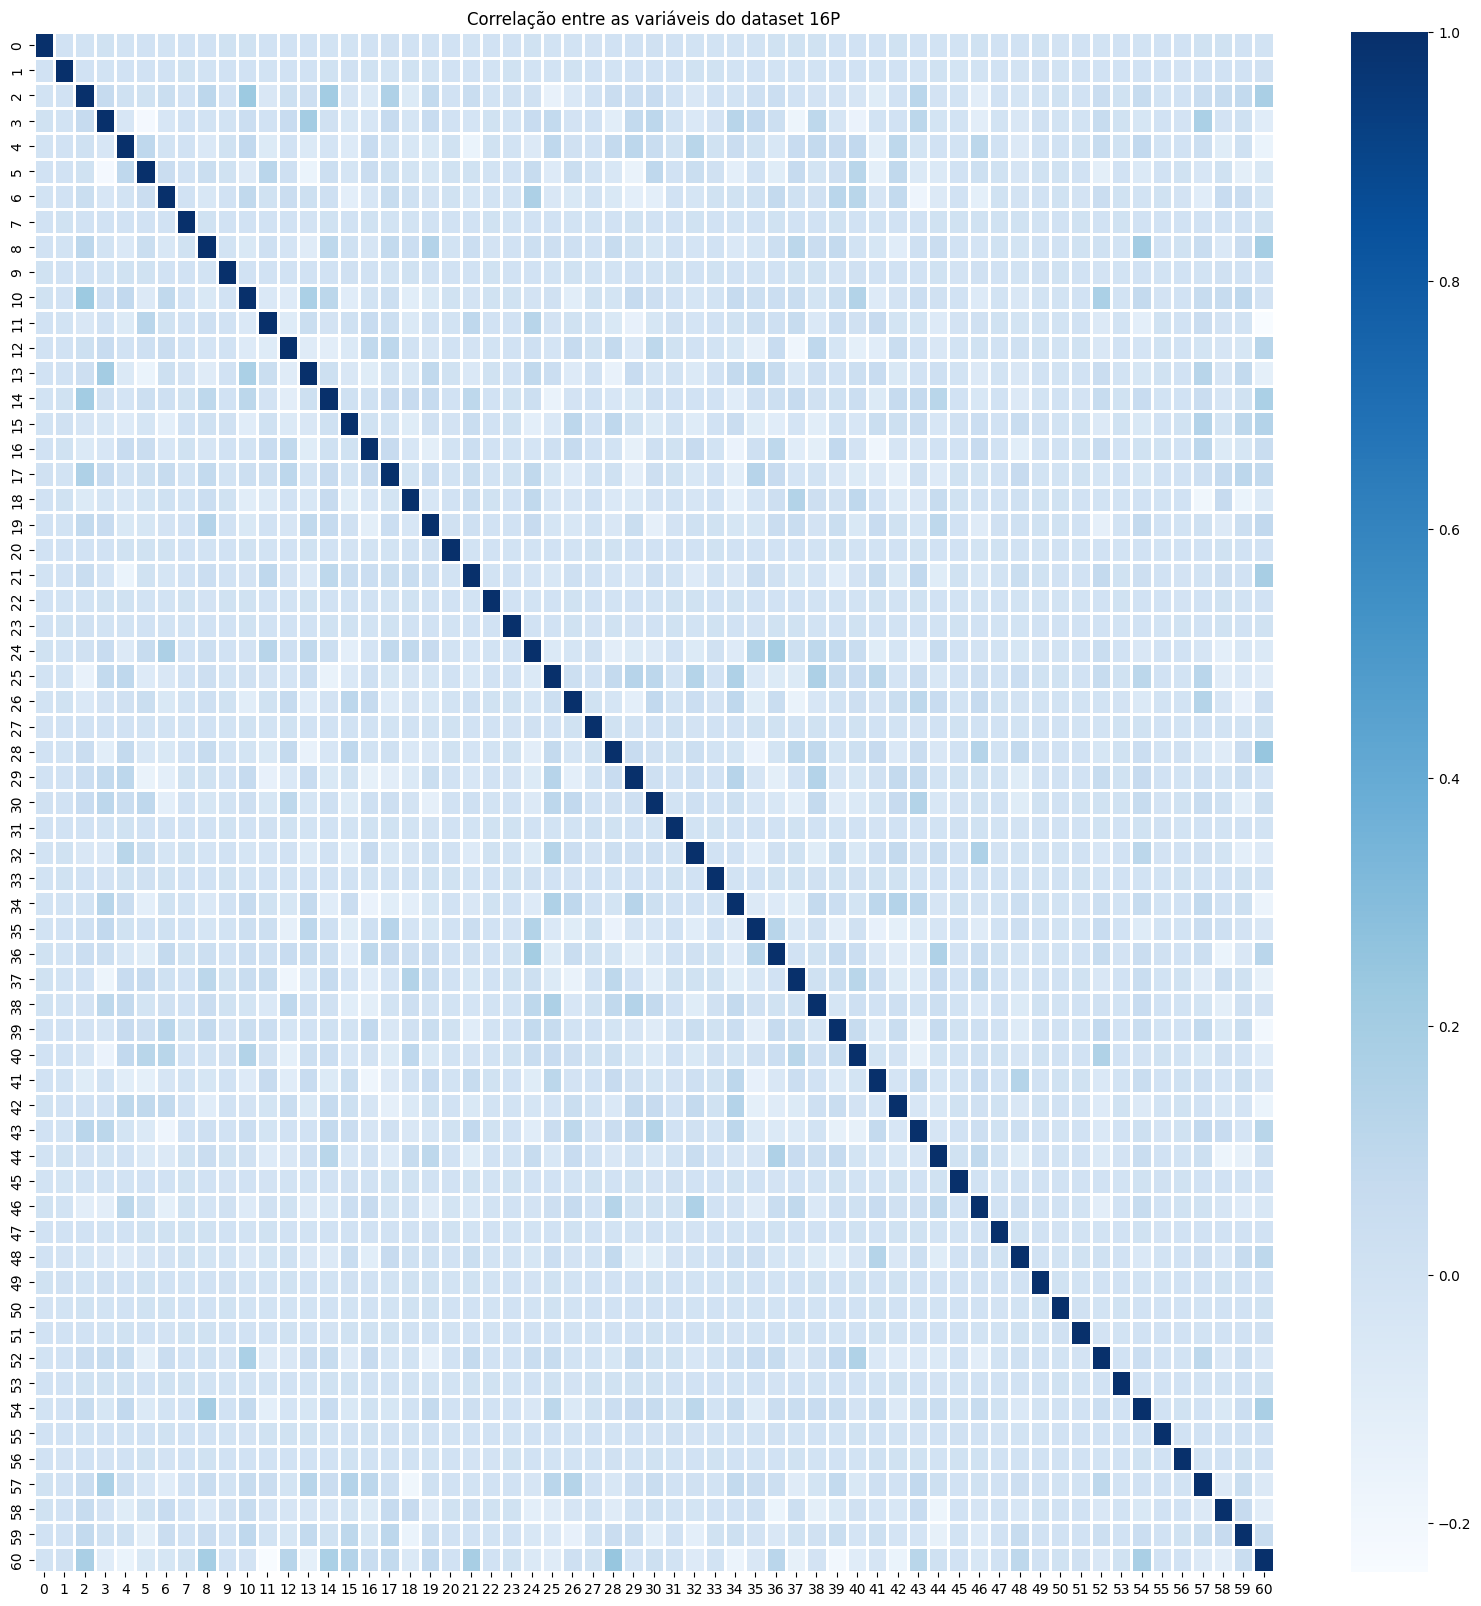

In [15]:
# Traçando um gráfico de correlação pra ver quais colunas tem maior correlação com outras.
corr_matrix = df.corr()

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='Blues', fmt='.2f', linewidths=2)
plt.title('Correlação entre as variáveis do dataset 16P')
plt.show()
#Eu sei que isso ta horrivel foi só pra testar mesmo

In [16]:
print(corr_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.001872 -0.003700  0.004305 -0.002460  0.000428 -0.002956   
1   0.001872  1.000000  0.001856 -0.003393 -0.001457  0.001447 -0.001180   
2  -0.003700  0.001856  1.000000  0.071982  0.014353  0.003865  0.042517   
3   0.004305 -0.003393  0.071982  1.000000 -0.040502 -0.210979 -0.037477   
4  -0.002460 -0.001457  0.014353 -0.040502  1.000000  0.094573 -0.002772   
..       ...       ...       ...       ...       ...       ...       ...   
56 -0.001109 -0.009923 -0.000682 -0.008573 -0.000391  0.005970 -0.009071   
57  0.002872 -0.000678  0.051303  0.171982  0.035731 -0.040249 -0.098562   
58  0.002963 -0.000958  0.060876 -0.009186 -0.094340  0.006118  0.059372   
59  0.001511 -0.000702  0.080745  0.014211  0.012393 -0.113607  0.049881   
60 -0.006053  0.007773  0.181562 -0.098356 -0.160588 -0.052378 -0.033947   

          7         8         9   ...        51        52        53        54  \
0   0.

In [17]:
# vou ordenar pra facilitar a visualização
correlation_values = corr_matrix.unstack().sort_values(ascending=False)

pd.set_option('display.max_rows', None)

# Filtrar as correlações de uma coluna com ela propria
correlation_values = correlation_values[correlation_values.index.get_level_values(0) != correlation_values.index.get_level_values(1)]

# print(correlation_values)

60  28    0.245569
28  60    0.245569
10  2     0.227912
2   10    0.227912
14  2     0.209051
2   14    0.209051
54  8     0.203847
8   54    0.203847
3   13    0.203231
13  3     0.203231
36  24    0.196917
24  36    0.196917
8   60    0.193288
60  8     0.193288
    21    0.187023
21  60    0.187023
60  2     0.181562
2   60    0.181562
60  54    0.177036
54  60    0.177036
10  13    0.176097
13  10    0.176097
52  10    0.175074
10  52    0.175074
14  60    0.173308
60  14    0.173308
57  3     0.171982
3   57    0.171982
24  6     0.169900
6   24    0.169900
38  25    0.168116
25  38    0.168116
32  46    0.162695
46  32    0.162695
2   17    0.160942
17  2     0.160942
36  44    0.160934
44  36    0.160934
25  34    0.157564
34  25    0.157564
40  52    0.155406
52  40    0.155406
30  43    0.147332
43  30    0.147332
24  35    0.145567
35  24    0.145567
40  10    0.143304
10  40    0.143304
18  37    0.142951
37  18    0.142951
34  42    0.142603
42  34    0.142603
15  60    0.

In [18]:
# Resetar o índice
correlation_values = correlation_values.reset_index()
correlation_values.columns = ['Variable1', 'Variable2', 'Correlation']

In [19]:
# Definir as faixas de correlação
faixas = {
    'correlação baixa': (0.3, 0.5),
    'média': (0.5, 0.7),
    'alta': (0.7, 0.99),
    'correlação baixa inversamente proporcional': (-0.5, -0.3),
    'média inversamente proporcional': (-0.7, -0.5),
    'alta inversamente proporcional': (-0.99, -0.7)
}

# Imprimir as correlações dentro de cada faixa
for faixa, (min_val, max_val) in faixas.items():
    correlacoes = corr_matrix[(corr_matrix >= min_val) & (corr_matrix < max_val)]
    if not correlacoes.empty:
        print(f'Faixa de correlação: {faixa}')
        for col1 in correlacoes.columns:
            for col2 in correlacoes.index:
                valor_correlacao = correlacoes.loc[col2, col1]
                if not pd.isna(valor_correlacao):
                    print(f'Variável {col1} e Variável {col2}: {valor_correlacao}')
        print('\n')

Faixa de correlação: correlação baixa


Faixa de correlação: média


Faixa de correlação: alta


Faixa de correlação: correlação baixa inversamente proporcional


Faixa de correlação: média inversamente proporcional


Faixa de correlação: alta inversamente proporcional




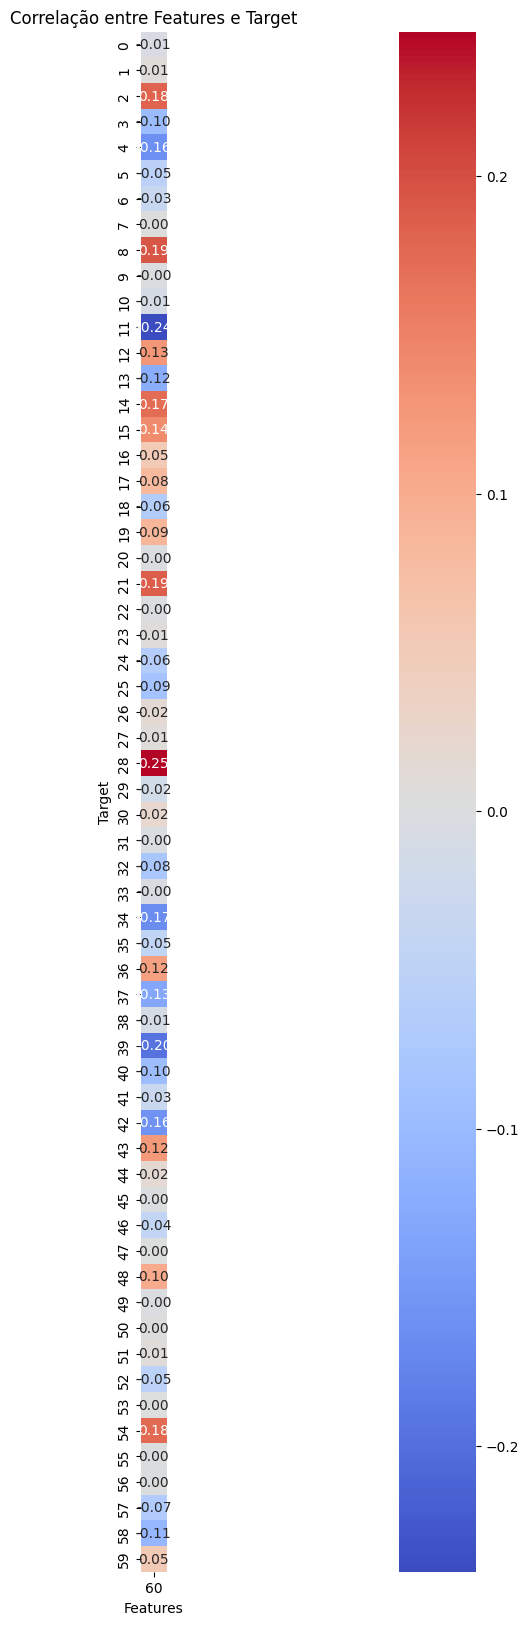

In [20]:
correlation_matrix_2 = df.corr()
correlation_with_target = correlation_matrix_2.iloc[:-1, -1]
plt.figure(figsize=(60, 20))
sns.heatmap(correlation_with_target.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=True, square=True)
plt.title('Correlação entre Features e Target')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

In [21]:
print(correlation_with_target)

0    -0.006053
1     0.007773
2     0.181562
3    -0.098356
4    -0.160588
5    -0.052378
6    -0.033947
7     0.004137
8     0.193288
9    -0.000456
10   -0.011952
11   -0.239620
12    0.126825
13   -0.121279
14    0.173308
15    0.139932
16    0.053297
17    0.080624
18   -0.063762
19    0.087765
20   -0.001402
21    0.187023
22   -0.000995
23    0.006375
24   -0.062750
25   -0.085554
26    0.017497
27    0.006818
28    0.245569
29   -0.016967
30    0.022705
31   -0.002834
32   -0.079006
33   -0.004767
34   -0.165623
35   -0.046298
36    0.115173
37   -0.131248
38   -0.011256
39   -0.196082
40   -0.096761
41   -0.029515
42   -0.159757
43    0.122697
44    0.016379
45    0.000516
46   -0.042177
47    0.001873
48    0.102036
49   -0.002260
50    0.004098
51    0.008036
52   -0.050353
53    0.002668
54    0.177036
55    0.000980
56    0.000620
57   -0.068480
58   -0.106624
59    0.054334
Name: 60, dtype: float64


In [22]:
# Criar dicionário para armazenar as features em cada faixa
features_por_faixa = {faixa: [] for faixa in faixas}

# Iterar sobre a série de correlação
for feature, correlacao in correlation_with_target.items():
    for faixa, (minimo, maximo) in faixas.items():
        if minimo <= correlacao < maximo:
            features_por_faixa[faixa].append(feature)

# Exibir as features em cada faixa
for faixa, features in features_por_faixa.items():
    print(f'Faixa de correlação: {faixa}')
    print(f'Features: {features}')
    print('\n')


Faixa de correlação: correlação baixa
Features: []


Faixa de correlação: média
Features: []


Faixa de correlação: alta
Features: []


Faixa de correlação: correlação baixa inversamente proporcional
Features: []


Faixa de correlação: média inversamente proporcional
Features: []


Faixa de correlação: alta inversamente proporcional
Features: []




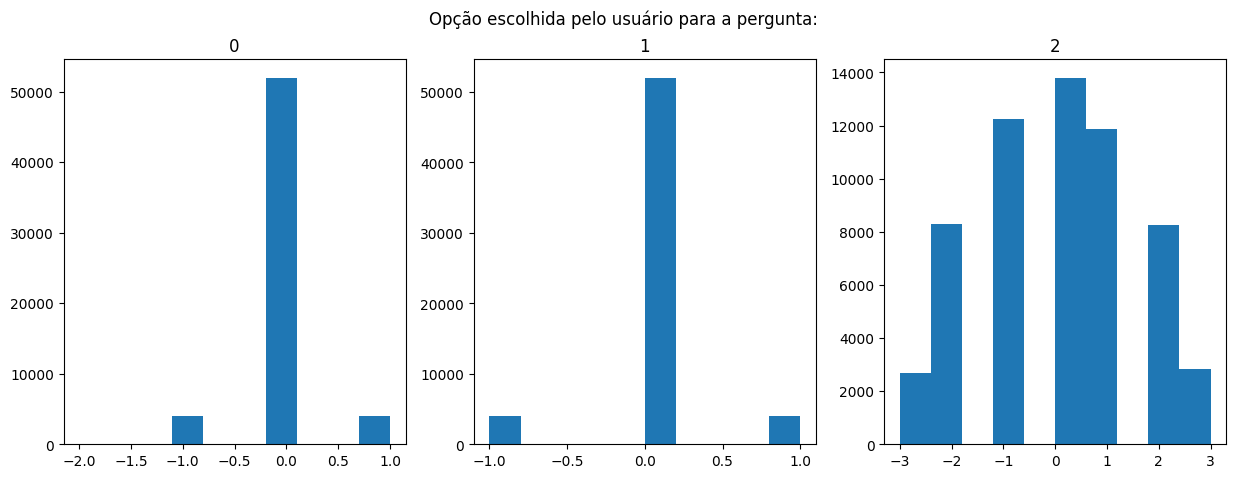

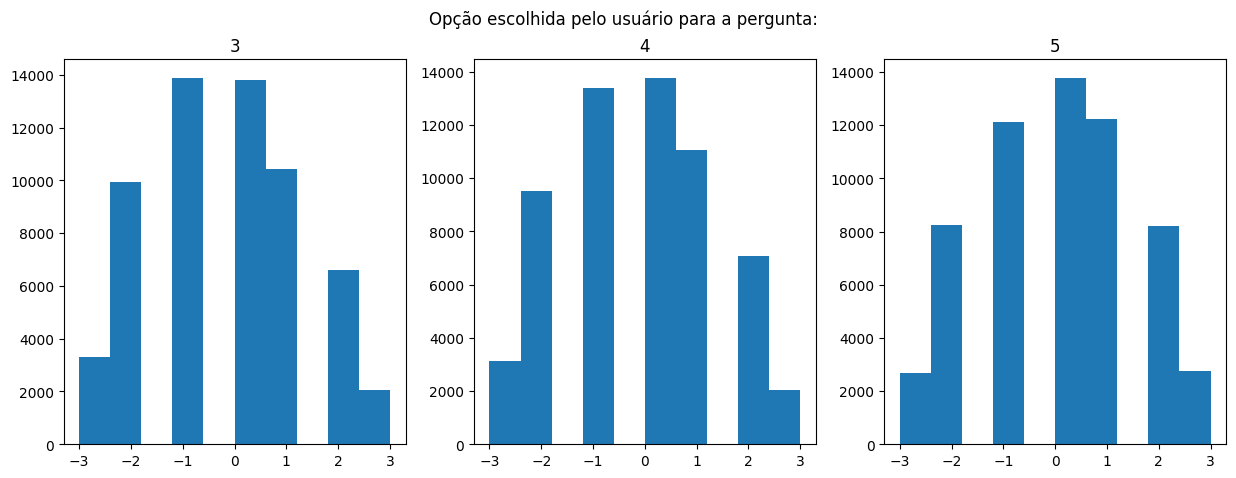

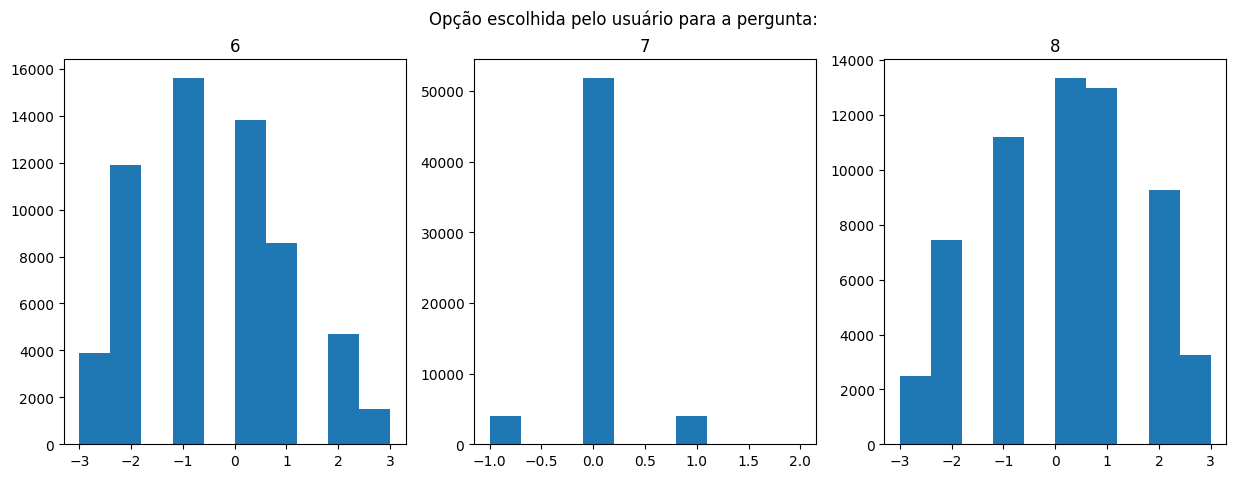

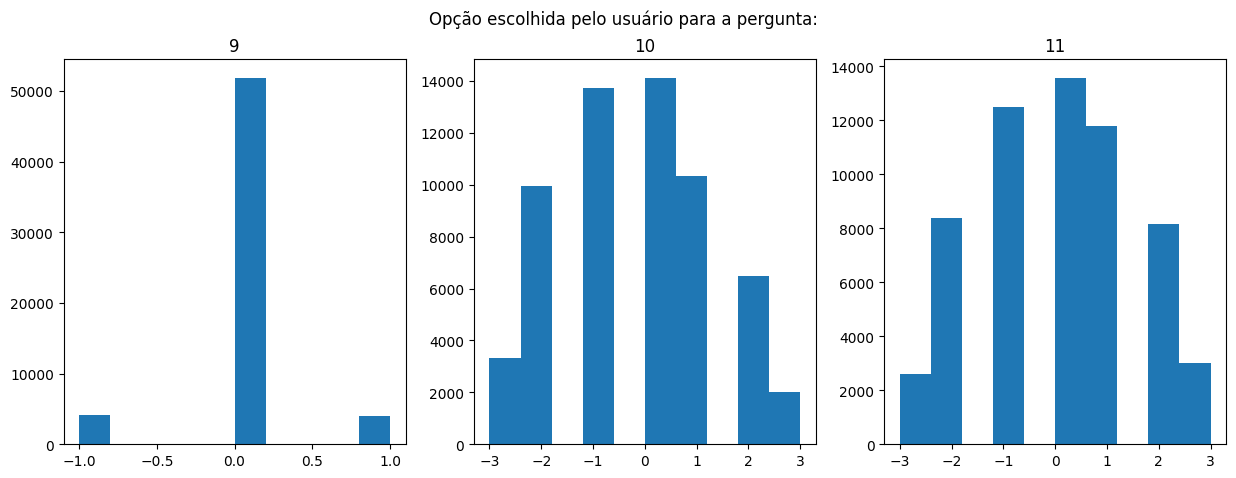

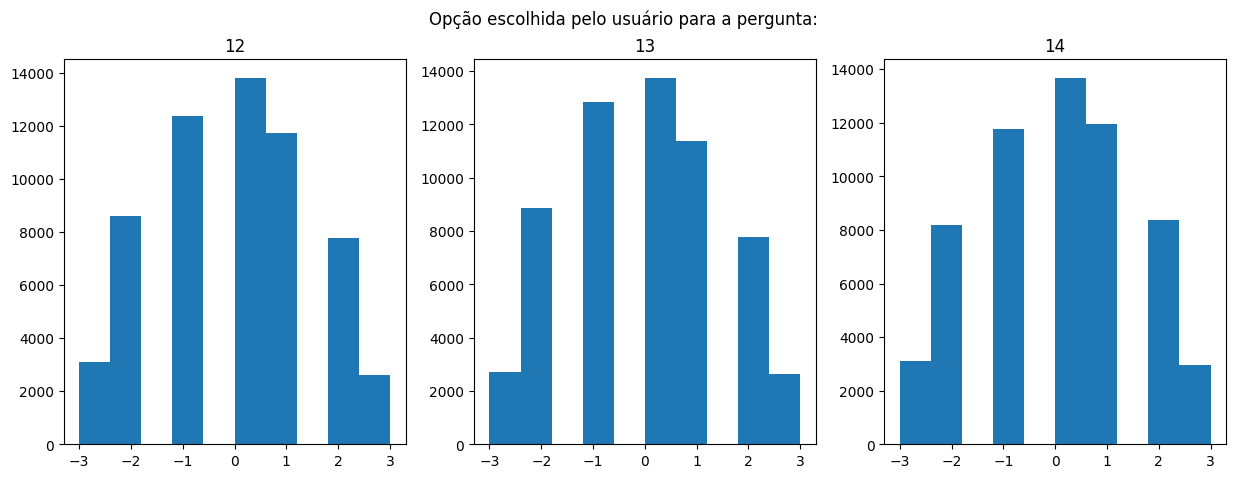

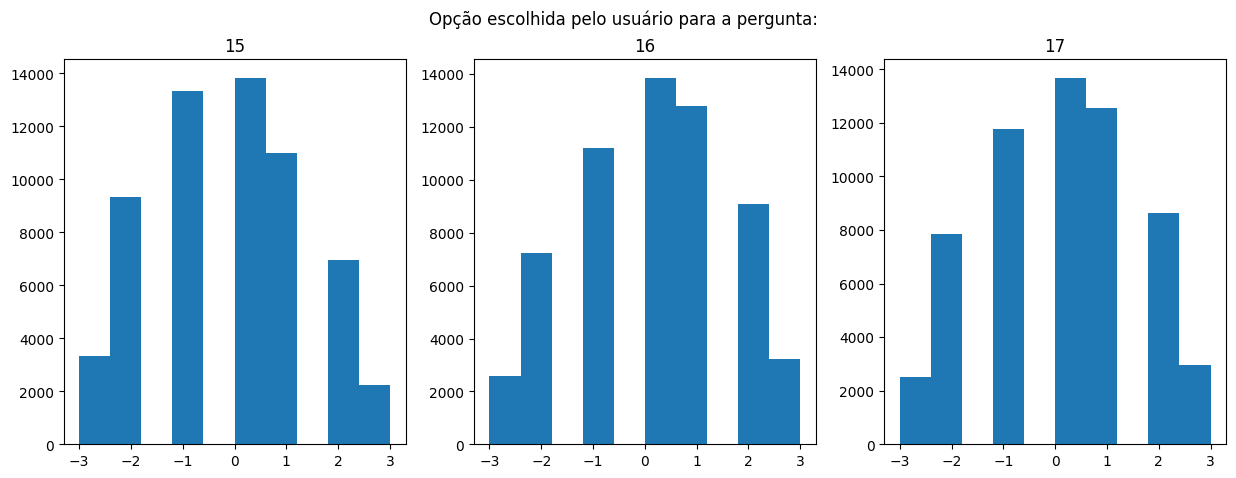

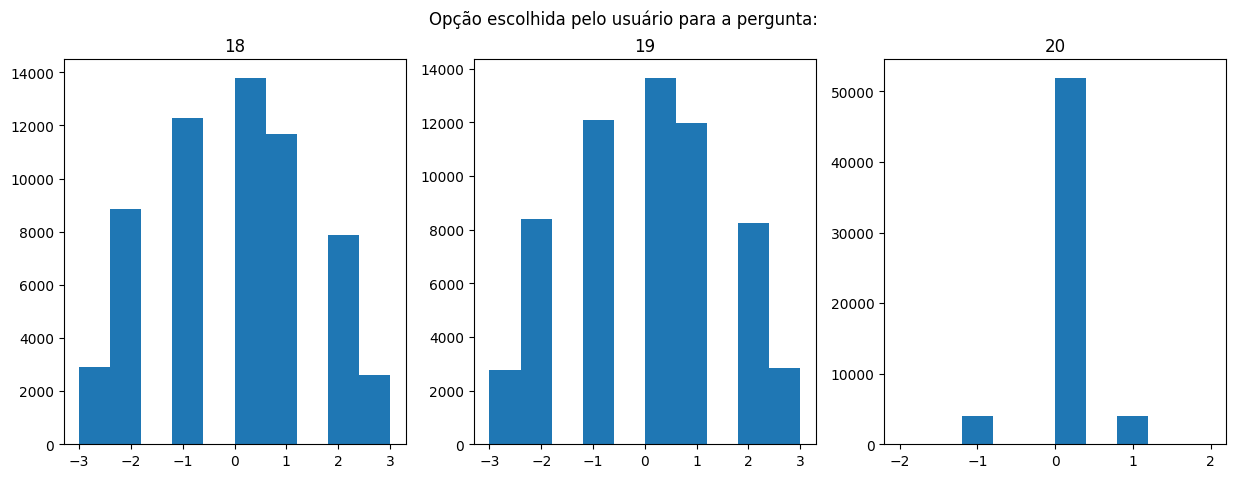

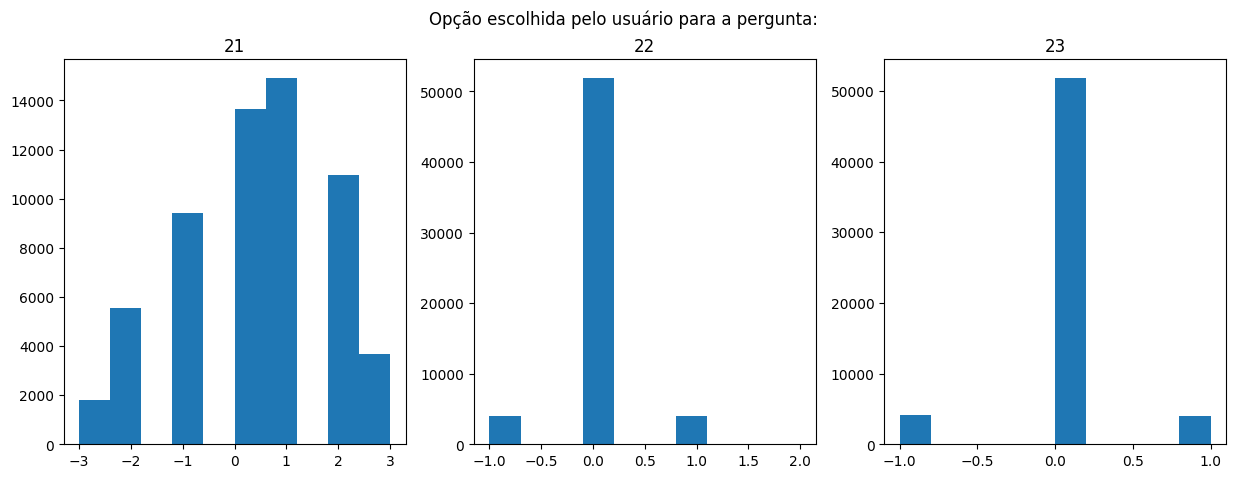

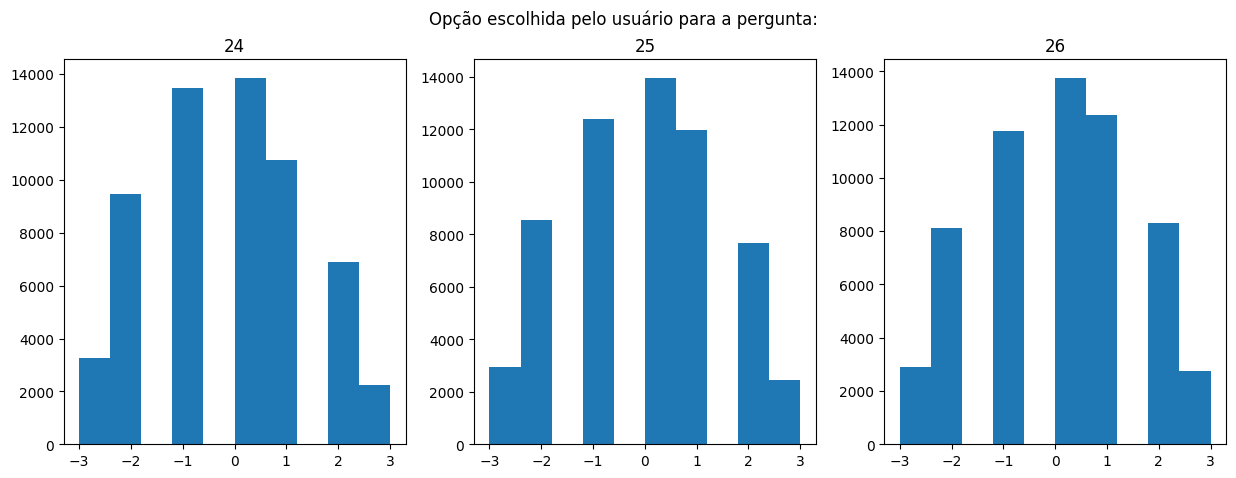

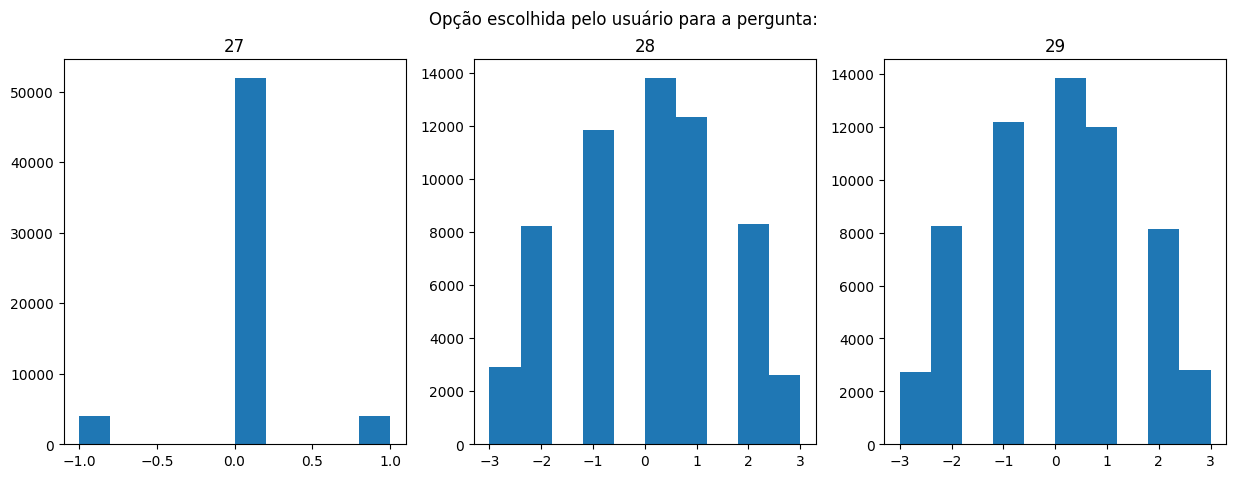

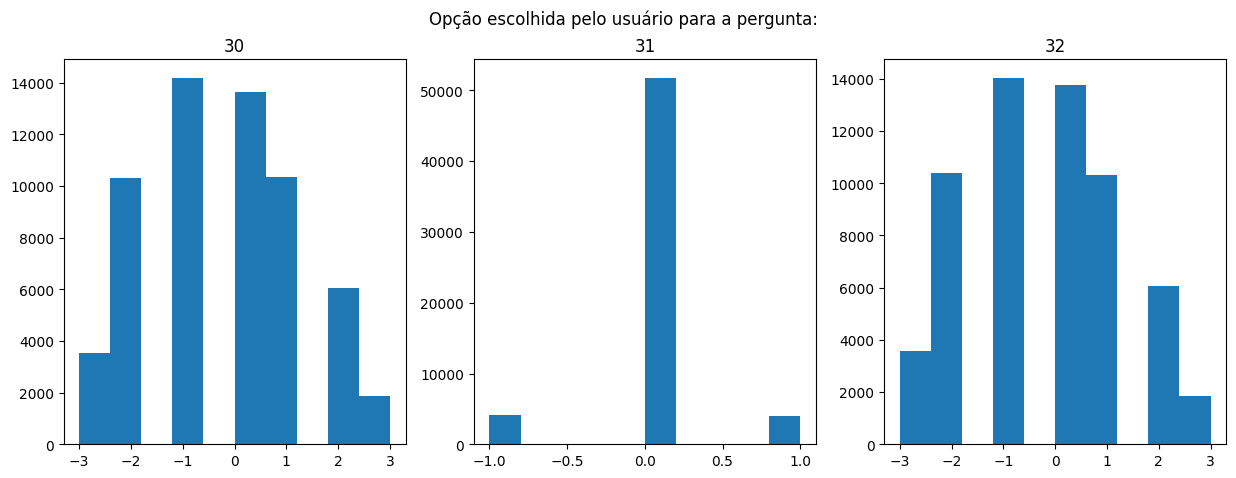

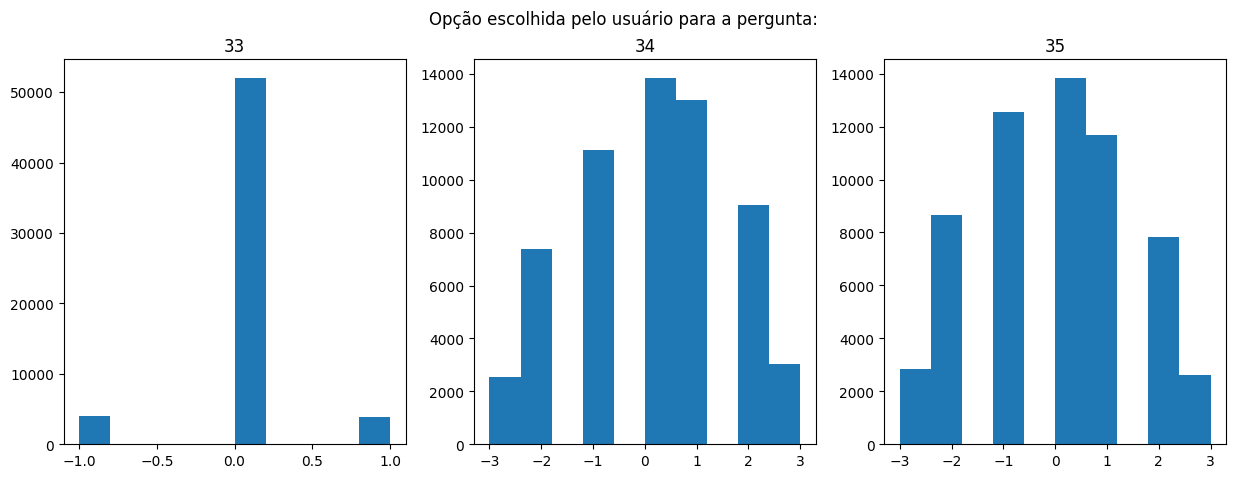

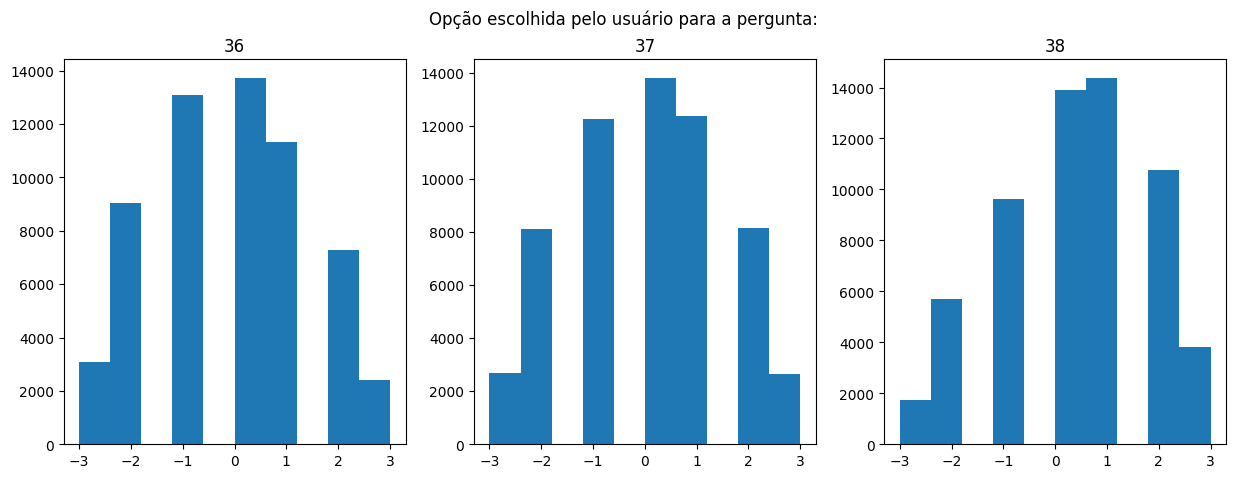

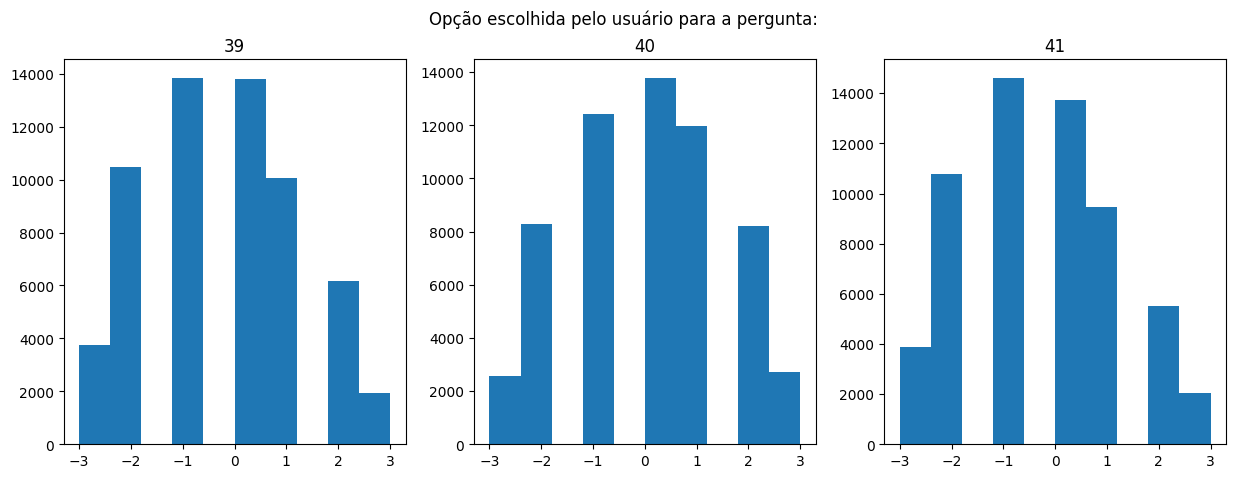

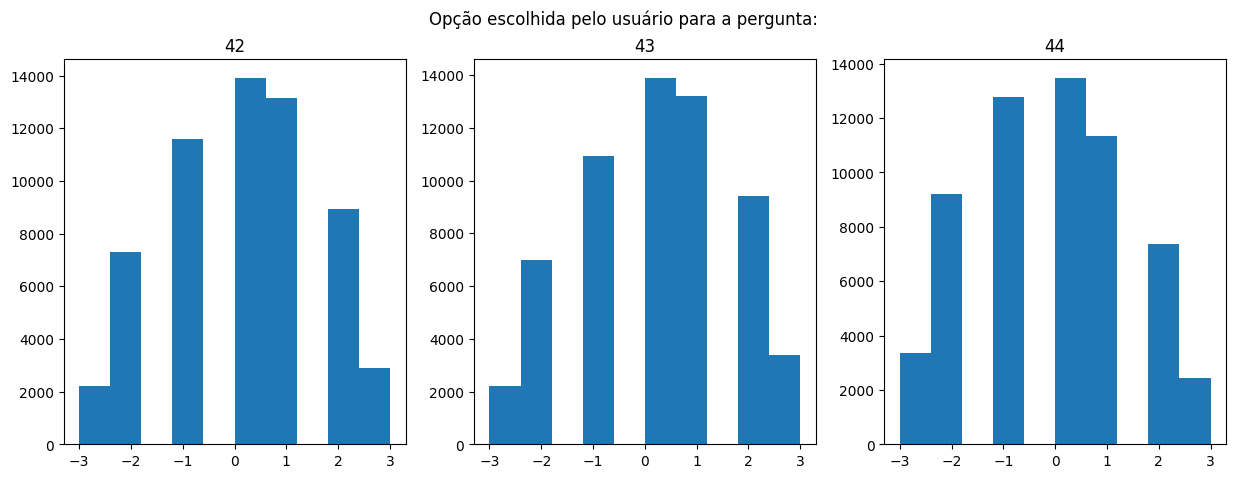

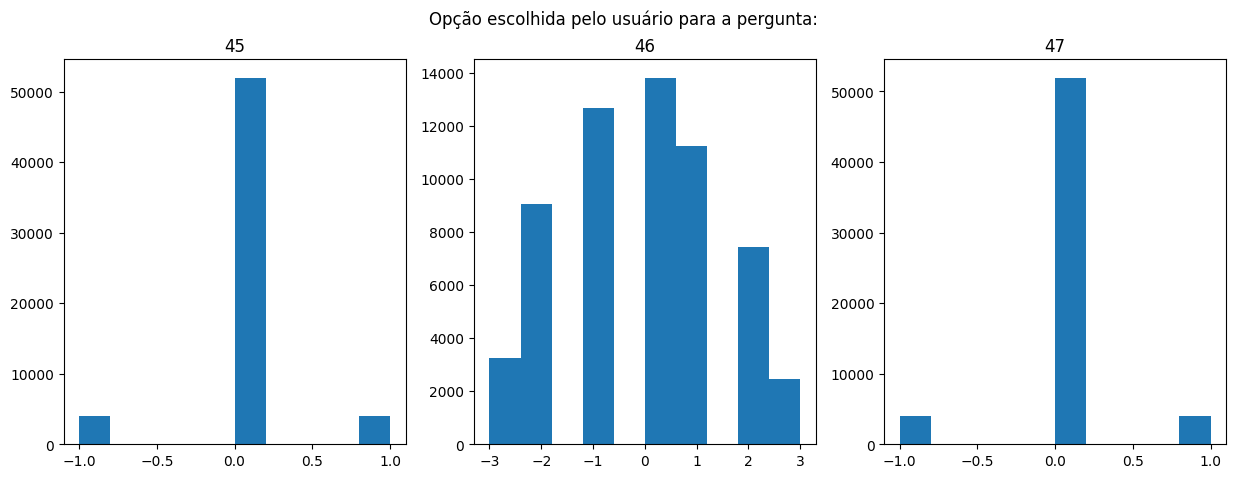

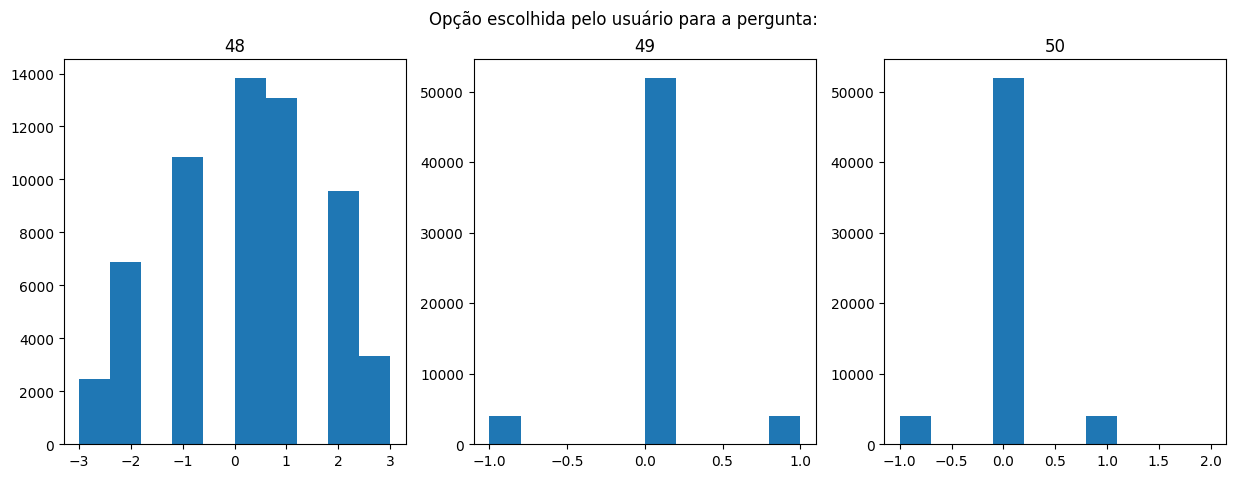

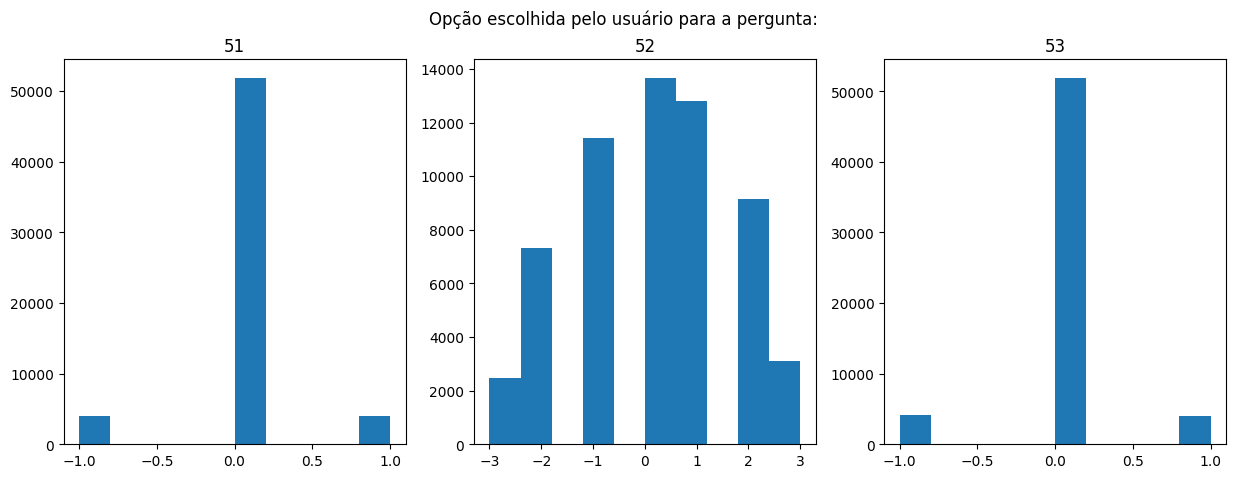

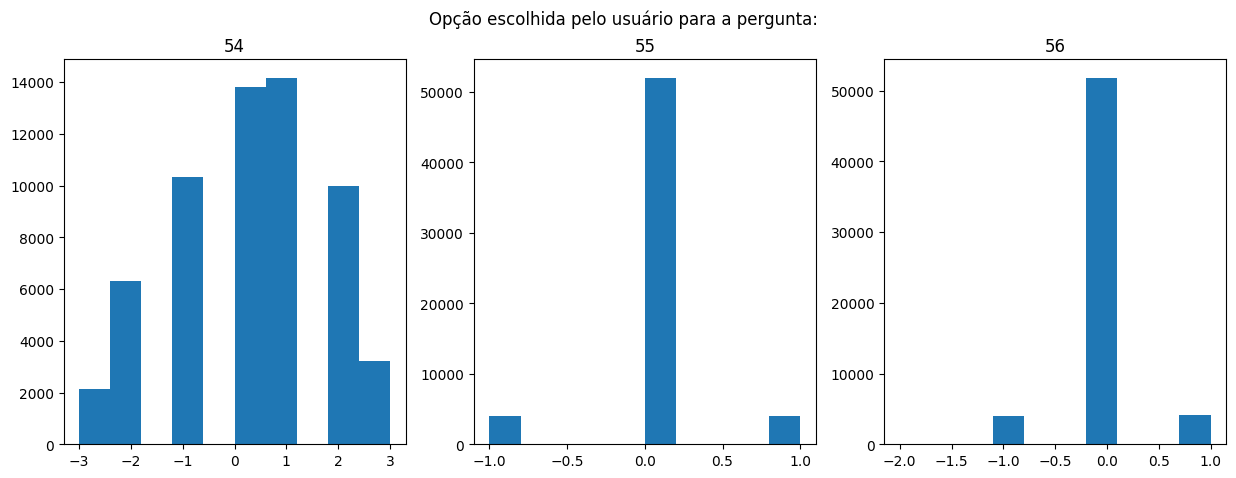

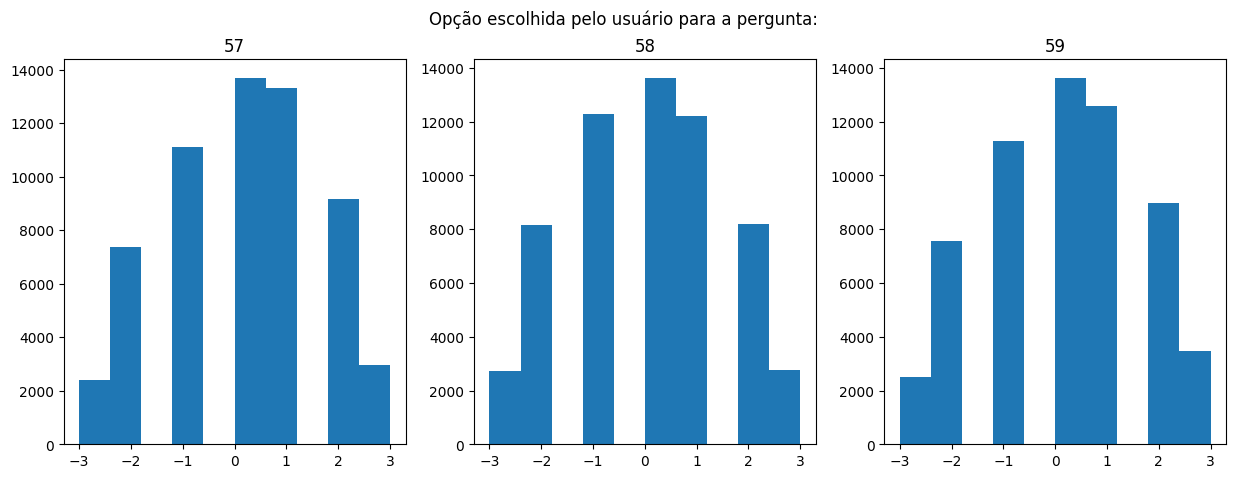

In [23]:
# Plotando histogramas para cada personalidade
for i in range(20):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Opção escolhida pelo usuário para a pergunta: ')
    for j in range(3):
        axs[j].hist(df.iloc[:, i*3 + j].dropna())
        axs[j].set_title(j + i*3) #Como os títulos sao muito grandes, decidi mudar para o numero da coluna

plt.show()

# Regressão Logística

### Definindo o target

In [73]:
# Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std

In [69]:
# Analisando o dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,5
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,9
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,12
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,11
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,4


In [70]:
# Separando as colunas entre X e y
X = df.iloc[:, 0:60]
y = df[60]

### Criando o Modelo

In [98]:
# Define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

### Treinando e Avaliando o Modelo

#### 1. Validação Cruzada

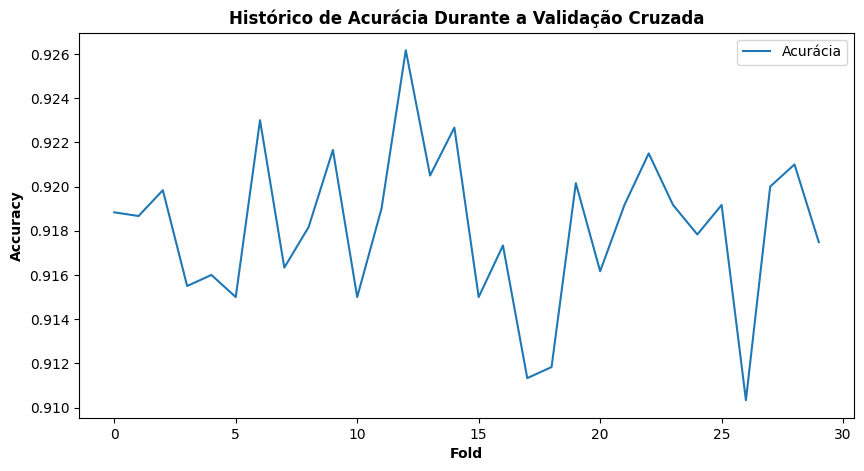

In [99]:
# Define the model evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

# Acurácia em cada fold
accuracies = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Plotar o gráfico
plt.figure(figsize=(10,5))
plt.plot(accuracies, label='Acurácia')
plt.xlabel('Fold', fontweight="bold")
plt.ylabel('Accuracy', fontweight="bold")
plt.title('Histórico de Acurácia Durante a Validação Cruzada', fontweight="bold")
plt.legend()
plt.show()

# Variação da acurácia ao longo das iterações da validação cruzada para visualizar a estabilidade e a confiabilidade do modelo

In [97]:
# Acurácia média do treinamento com validação cruzada
print('Acurácia média: %.3f (%.3f)' % (mean(accuracies), std(accuracies)))

Acurácia média: 0.918 (0.003)


#### 2. Matriz de confusão

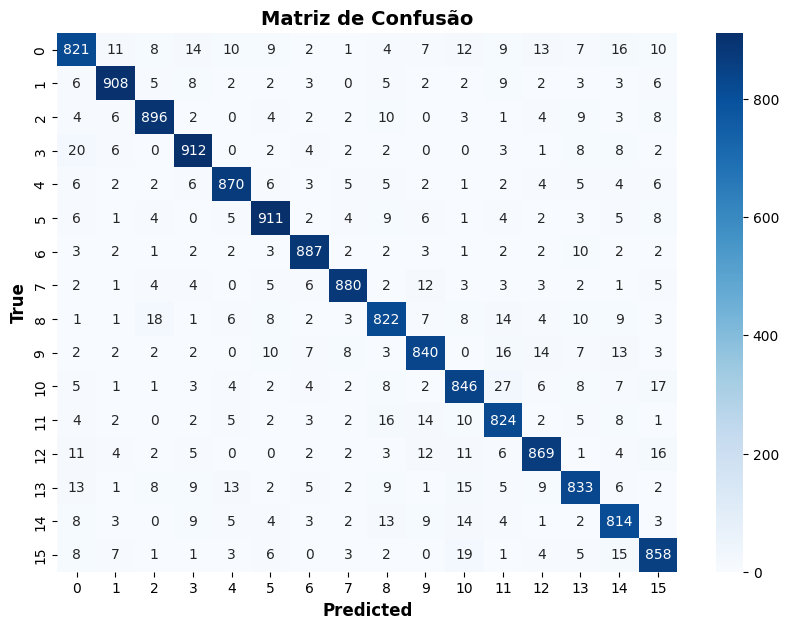

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Criar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted', fontsize=12, fontweight="bold")
plt.ylabel('True', fontsize=12, fontweight="bold")
plt.title('Matriz de Confusão', fontweight="bold", fontsize=14)
plt.show()

#### 3. Curva ROC

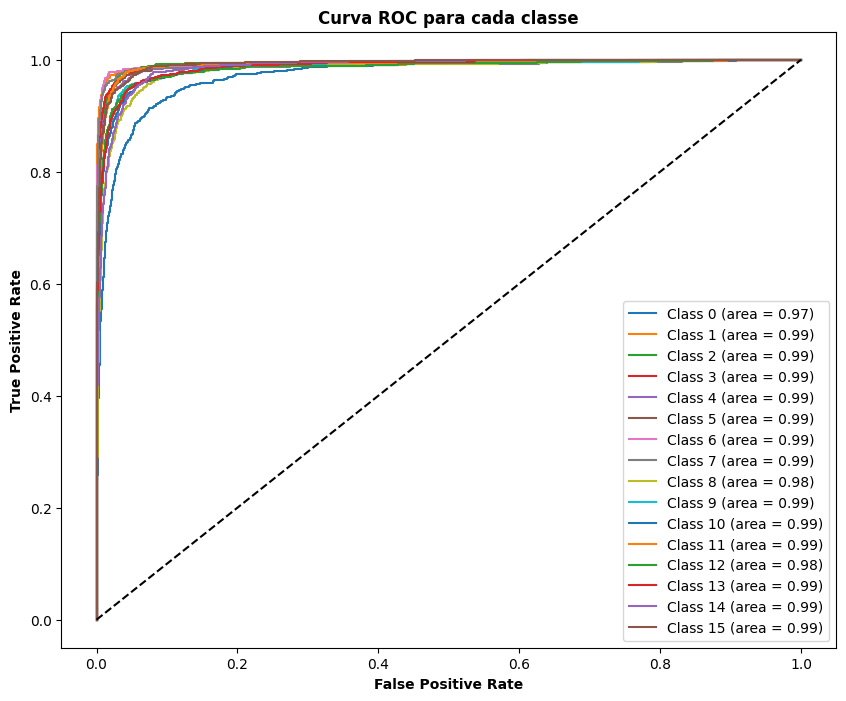

In [94]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarizar as labels
y_bin = label_binarize(y, classes=np.unique(y))

# Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.25, random_state=42)

# Treinar o modelo com estratégia One-vs-Rest
ovr_model = OneVsRestClassifier(model)
ovr_model.fit(X_train, y_train)

# Calcular as probabilidades de cada classe
y_prob = ovr_model.predict_proba(X_test)

# Plotar a curva ROC para cada classe
plt.figure(figsize=(10,8))
for i in range(y_prob.shape[1]):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='Class %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontweight="bold")
plt.ylabel('True Positive Rate', fontweight="bold")
plt.title('Curva ROC para cada classe', fontweight="bold")
plt.legend(loc="lower right")
plt.show()

# È uma representação gráfica da capacidade do modelo de discriminar entre classes

# Random Forest

In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [36]:
y_pred2 = classifier.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[869  14   5  11   2   2   2   3   2   6   7   6   7   2   8   8]
 [  8 888  11   6   5   5   6   1   3   3   6   8   2   3   5   6]
 [  8  20 865   5   2   5   5   4   9   4   4   3   3   6   2   9]
 [ 19   8   9 894   3   5   5   6   1   0   2   2   2   4   3   7]
 [ 11  11   6  10 860   3   1   2   1   3   2   5   4   2   4   4]
 [ 14  12  11   3   4 888   5   3   6   4   5   2   3   3   3   5]
 [ 12   3  11  10   8   4 854   4   2   2   2   2   3   5   0   4]
 [  8   4   7   8   0   3  13 864   3   6   3   3   4   1   2   4]
 [  7   7  21   5  13   6   7   6 804   9   4   6   4  10   5   3]
 [ 10   4   9   7   4  23   6  15  12 810   1   9  11   2   4   2]
 [ 10   6   4   4   5   5   3  10  11   3 849  14   1   2   2  14]
 [  5  10   6   6  11   5   5   3  10  11  13 806   2   0   4   3]
 [ 14  10  17   9   4   5   6   7   8  15  10   4 823   3   3  10]
 [ 11   7  19  12   9   1  17   3  11   6   5   8   2 818   0   4]
 [ 10  11   3   7   9   9   4   7   6   8   6   4   1   4 798 

0.8994

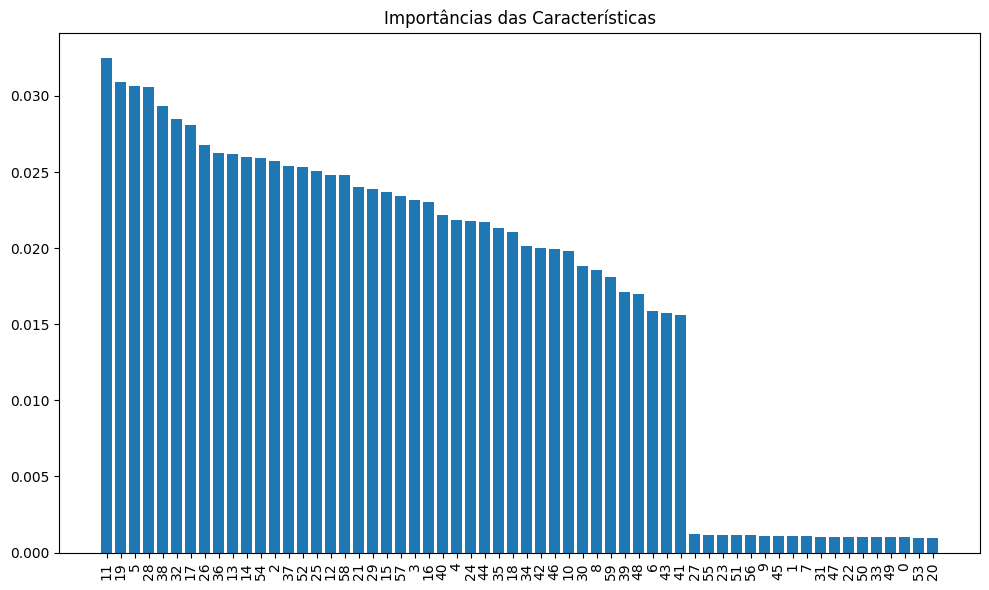

In [38]:
importances = classifier.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Importâncias das Características")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

In [39]:
report = classification_report(y_test, y_pred2)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       954
           1       0.86      0.92      0.89       966
           2       0.86      0.91      0.88       954
           3       0.89      0.92      0.91       970
           4       0.90      0.93      0.91       929
           5       0.90      0.91      0.91       971
           6       0.91      0.92      0.91       926
           7       0.91      0.93      0.92       933
           8       0.90      0.88      0.89       917
           9       0.91      0.87      0.89       929
          10       0.91      0.90      0.90       943
          11       0.91      0.90      0.90       900
          12       0.94      0.87      0.90       948
          13       0.94      0.88      0.91       933
          14       0.93      0.89      0.91       894
          15       0.90      0.86      0.88       933

    accuracy                           0.90     15000
  

In [40]:
"""
    Aqui, eu antes tinha utilizado uma documentação do github para aplicar a Random-Forest, mas a accuracy usando o scikit-learn diretamente foi maior,
então optei por manter o resultado final assim.
==================================================================
Dados anteriores:
    train_preds = rf_model.predict(X_set=X_train)
    print("TRAIN PERFORMANCE")
    print("Train size", len(Y_train))
    print("True preds", sum(train_preds == Y_train))
    print("Accuracy", sum(train_preds == Y_train) / len(Y_train))

    test_preds = rf_model.predict(X_set=X_test)
    print("TEST PERFORMANCE")
    print("Test size", len(Y_test))
    print("True preds", sum(test_preds == Y_test))
    print("Accuracy", sum(test_preds == Y_test) / len(Y_test))
    ============================================================
TRAIN PERFORMANCE:
    Train size 44999
    True preds 36516
    Accuracy 0.8114846996599925
    TEST PERFORMANCE
    Test size 15000
    True preds 12027
    Accuracy 0.8018

"""

'\n    Aqui, eu antes tinha utilizado uma documentação do github para aplicar a Random-Forest, mas a accuracy usando o scikit-learn diretamente foi maior,\nentão optei por manter o resultado final assim.\n==================================================================\nDados anteriores:\n    train_preds = rf_model.predict(X_set=X_train)\n    print("TRAIN PERFORMANCE")\n    print("Train size", len(Y_train))\n    print("True preds", sum(train_preds == Y_train))\n    print("Accuracy", sum(train_preds == Y_train) / len(Y_train))\n\n    test_preds = rf_model.predict(X_set=X_test)\n    print("TEST PERFORMANCE")\n    print("Test size", len(Y_test))\n    print("True preds", sum(test_preds == Y_test))\n    print("Accuracy", sum(test_preds == Y_test) / len(Y_test))\n    ============================================================\nTRAIN PERFORMANCE:\n    Train size 44999\n    True preds 36516\n    Accuracy 0.8114846996599925\n    TEST PERFORMANCE\n    Test size 15000\n    True preds 12027\n  

Neural-Network
